### 1. Imports
Load necessary libraries.

In [8]:
import os
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import matplotlib.pyplot as plt

# Set up logging
import logging
from src.utils.config_loader import ENVIRONMENT

if ENVIRONMENT == "production":
    logging.basicConfig(level=logging.WARNING)
else:
    logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


### 2. Load Data
Load the dataset that you'll be working with.

In [3]:
from src.data.data_loader import load_dataset
data =  load_dataset("processed", "train_data.csv")

### 3. Quick Data Overview
A brief look at the data.

In [4]:

data.head()
data.describe()

,size,weight
count,308.000000,308.000000
mean,203.457792,456.935065
std,112.283617,225.772382
min,1.000000,13.000000
25%,106.750000,272.250000
50%,201.500000,453.500000
75%,300.250000,643.000000
max,399.000000,864.000000


### 4. Train-Validation Split
Split the dataset into training and validation sets.

In [5]:

X = data.drop('weight', axis=1)
y = data['weight']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Model Prototyping
Prototype various models. For this example, let's prototype a simple linear regression.

##### 5-1. Cross-Validation on Model
Instead of just fitting the model on the training data and predicting on the validation data, you'd now apply cross-validation on the entire training dataset. This would give you an array of scores (e.g., R**2 values for linear regression) for each fold of the cross-validation.

In [10]:
model = LinearRegression()

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
logging.info(f"5-fold cross-validated MSE: {mse_scores}")
logging.info(f"Mean MSE: {mse_scores.mean()}")
logging.info(f"Standard Deviation of MSE: {mse_scores.std()}")

##### 5-2. Final Model Training

In [13]:
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

### 6. Model Evaluation
Evaluate the model's performance using appropriate metrics.

In [14]:
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
logging.info(f"Mean Squared Error on Validation Set: {mse}")
logging.info(f"Mean Absolute Error on Validation Set: {mae}")
logging.info(f"R^2 Score: {r2}")

2023-10-30 14:03:20,970 - INFO - Mean Squared Error on Validation Set: 1998.2100946484286
2023-10-30 14:03:20,971 - INFO - Mean Absolute Error on Validation Set: 27.381424067549577
2023-10-30 14:03:20,972 - INFO - R^2 Score: 0.9590986045571286


### 7. Visualization
Visualize model predictions against actual values.

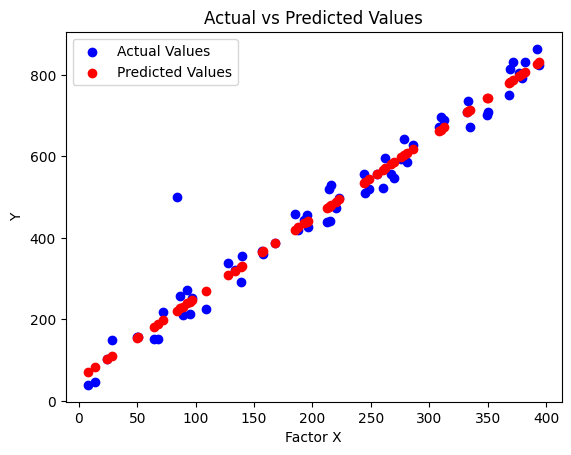

In [15]:

plt.scatter(X_val, y_val, color='blue', label='Actual Values')
plt.scatter(X_val, y_pred, color='red', label='Predicted Values')
plt.xlabel('Factor X')
plt.ylabel('Y')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()

### 8. Iterative Model Adjustments
Based on the evaluation, adjust the model, its hyperparameters, or even try different models. For example, if a linear regression doesn't fit well, you might try polynomial regression or another algorithm.

### 9. Notes and Observations
As it's a Jupyter notebook, you can make notes, observations, and document any insights or anomalies you observe during the prototyping phase.

Linear regression works fine! Start to build src/models/train.py
